# Недостаток RANDU


In [16]:
A = 65539
mod = 2**31
seed = 1

In [18]:
class Generator:
    def __init__(self, mul, mod,seed):
        self.mul = mul
        self.mod = mod
        self.div = mod**(-1)
        self.currvalue = seed
    def rand(self):
        self.currvalue = (self.currvalue*self.mul) % self.mod
        return self.currvalue*self.div
    

In [19]:
gen = Generator(A, mod, seed)

### Можно получить связь между тремя последовательными значениями датчика RANDU
### $x_{k+2} \equiv 65539x_{k+1} \equiv (2^{16}+3)^2x_k \equiv \\ \equiv(2^{32}+6*2^{16}+9)x_k \equiv 6\cdot65539x_{k}-9x_k$
### $9x_k-6x_{k+1}+x_{k+2} = c*2^{31}, \ c \in \mathbb{Z}$
### Поэтому значения, выдаваемые генератором $y_i = x_i/2^{31}$, лежат на плоскостях
### $9x-6y+z = c,\ x,y,z \in [0,1]$

In [6]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

In [22]:
ndots = 10000

In [23]:
values = [gen.rand() for _ in range(ndots)]
s=0

In [ ]:
values

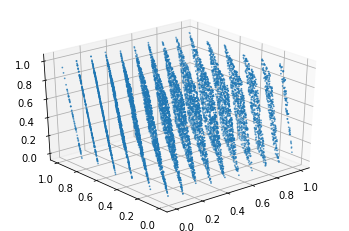

In [32]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(values[:ndots-2], values[1:ndots-1], values[2:], s=0.6)

ax.view_init(30, -130)
#plt.draw()


### Видим, что точки действительно лежат на плоскостях
### Зная выражение для плоскостей, легко можно придумать интеграл, который метод Монте-Карло с датчиком RANDU посчитает плохо
### $I = \iiint_{[0,1]^3}\cos^2((9x-6y+z)\pi)dxdydz = 0.5$

In [33]:
from math import cos, pi
f = lambda x,y,z: cos((9*x-6*y+z)*pi)**2


In [36]:
def rand3():
    return gen.rand(), gen.rand(), gen.rand()
def MCmethod(func,xlimits, ylimits, zlimits):
    s = 0
    for _ in range(10000):
        x, y, z = rand3()
        s+=func(x,y,z)
    return s*(xlimits[1]-xlimits[0])*(ylimits[1]-ylimits[0])*(zlimits[1]-zlimits[0])/10000
        

In [37]:
MCmethod(f,[0,1],[0,1],[0,1])

1.0

### Так как Python random использует для генерации алгоритм Mersenne Twister, достаточно подключить обычную библиотеку random

In [38]:
import random

def rand3_MT():
    return random.random(), random.random(), random.random()
def MCmethod_MT(func,xlimits, ylimits, zlimits):
    s = 0
    for _ in range(10000):
        x, y, z = rand3_MT()
        s+=func(x,y,z)
    return s*(xlimits[1]-xlimits[0])*(ylimits[1]-ylimits[0])*(zlimits[1]-zlimits[0])/10000
   


In [39]:
MCmethod_MT(f,[0,1],[0,1],[0,1])

0.5015161206878078